# Homework 4 (Full mark: 100pt)
- Questions 1~3: Conceptual
- Questions 4~8: Programming

# Conceptual questions

# 1. Decision tree (15pt)

**It is mentioned in Section 8.2.3 that boosting using depth-one trees (or stumps) leads to an additive model: that is, a model of the form**

$f(X)=\sum_{j=1}^{p} f_{j}\left(X_{j}\right)$

**Explain why this is the case. You can begin with (8.12) in Algorithm 8.2 in the textbook**

As for depth-one trees, value of d is 1. Each tree is generated by splitting the data on only one predictor and the final model is formed by adding the shrunken version of them repeatedly. Hence, in the final model: $\widehat{f}(x) = \sum_{b=1}^{B} \lambda \widehat{f}^b(x)$ each additive term will depend on only one predictor leading to an additive model.

# 2. Hyperplanes (8pt)

**We have seen that in $p = 2$ dimensions, a linear decision boundary takes the form $\beta_0+\beta_1X_1+\beta_2X_2 = 0$. We now investigate a non-linear decision boundary.**

**(a) Sketch the curve**: $\left(1+X_{1}\right)^{2}+\left(2-X_{2}\right)^{2}=4$

**(b) On your sketch, indicate the set of points for which** $\left(1+X_{1}\right)^{2}+\left(2-X_{2}\right)^{2}>4$ **as well as the set of points for which** $\left(1+X_{1}\right)^{2}+\left(2-X_{2}\right)^{2}\leq4$.

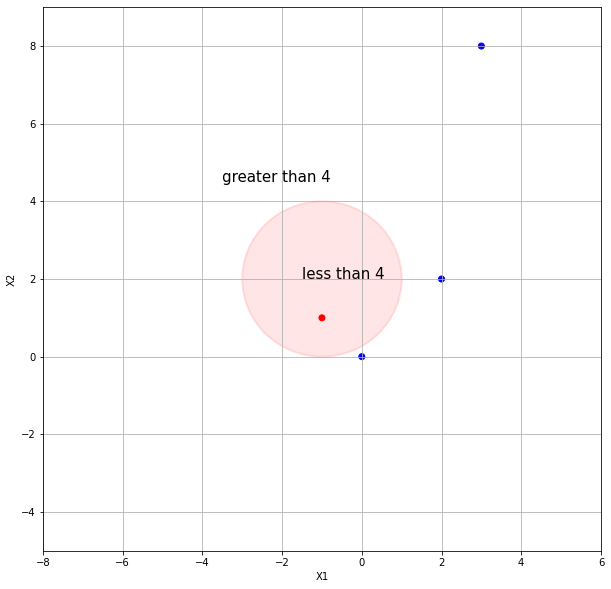

In [1]:
import numpy as np
import pandas as pd
import patsy as pt
import matplotlib.pyplot as plt
import seaborn as sns

circle = plt.Circle((-1, 2), radius=2, facecolor='r', alpha=0.1, edgecolor='r', linewidth=2.0)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.add_artist(circle)
plt.text(-1.5, 2, "less than 4", fontdict={'color':'black', 'size':15})
plt.text(-3.5, 4.5, "greater than 4", fontdict={'color':'black', 'size':15})
plt.scatter([0, -1, 2, 3], [0, 1, 2, 8], c=['b', 'r', 'b', 'b'])

ax.set_xlim(-8, 6)
ax.set_ylim(-5, 9)
ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.grid()
plt.show()

**(c) Suppose that a classifier assigns an observation to the blue class if** $\left(1+X_{1}\right)^{2}+\left(2-X_{2}\right)^{2}>4$**, and to the red class otherwise. To what class is the observation (0, 0) classified? (−1, 1)? (2, 2)? (3, 8)?**

(0, 0) is blue, (−1, 1) is orange, (2, 2) is blue and (3, 8) is blue.

**(d) Argue that while the decision boundary in (c) is not linear in terms of $X_{1}$ and $X_{2}$, it is linear in terms of $X_{1}, X_{1}^{2}, X_{2}$, and $X_{2}^{2}$**

Expanding the above equation, we get $X_1^2 + X_2^2 + 2X_1 - 4X_2 = -1$. which is linear in terms of $X_{1}, X_{1}^{2}, X_{2}$, and $X_{2}^{2}$.

# 3. Hierarchical clustering (10pt)

**Suppose that for a particular data set, we perform hierarchical clustering using single linkage and using complete linkage. We obtain two dendrograms.**

**(a) At a certain point on the single linkage dendrogram, the clusters $\{1,2,3\}$ and $\{4,5\}$ fuse. On the complete linkage dendrogram, the clusters $\{1,2,3\}$ and $\{4,5\}$ also fuse at a certain point. Which fusion will occur higher on the tree, or will they fuse at the same height, or is there not enough information to tell?**

In the case of complete linkage, the fusion will occure higher on the tree as it takes into account the maximum intercluster dissimilarity as the dissimilarity of the group.

**(b) At a certain point on the single linkage dendrogram, the clusters $\{5\}$ and $\{6\}$ fuse. On the complete linkage dendrogram, the clusers $\{5\}$ and $\{6\}$ also fuse at a certain point. Which fusion will occur higher on the tree, or will they fuse at the same height, or s there not enough information to tell?**

With two points, the fusion will occur at the same height as the minimal (for single) and maximal (for complete) intercluster distance will be same.

# Programming questions

# 4. Bagging (10pt)

**In Lab 7, we implemented bagged decision tree using** ````RandomForestRegressor(max_features=len(X_train.columns))```` **since random forest that uses all the features is equivalent to bagging. For this question, implement bagging  by using  ````DecisionTreeRegressor````**.

In [2]:
import graphviz
from six import StringIO
import pydotplus
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error

In [3]:
boston_df = pd.read_csv('data/Boston.csv').drop('Unnamed: 0', axis=1).dropna()
X = boston_df.drop('medv', axis=1)
y = boston_df.medv
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

# Pruning not supported. Choosing max depth 2
regr = DecisionTreeRegressor(max_depth=2)
regr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [4]:
#dot_data = StringIO()
#export_graphviz(regr, out_file=dot_data, feature_names=X_train.columns, filled=True, rounded=True, special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#Image(graph.create_png())

28.80154486445795

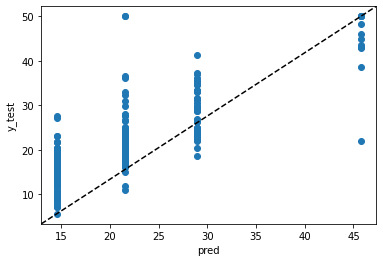

In [5]:
pred = regr.predict(X_test)
plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')
mean_squared_error(y_test, pred)

In [6]:
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=2), n_estimators=5, bootstrap=True, bootstrap_features=False, oob_score=True, random_state=2, verbose=1).fit(X_train, y_train)
test_score = model.score(X_test,y_test)
train_score = model.score(X_train,y_train)
train_score

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\Mark Mintae Kim\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:1066: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0.8110418779995319

# 5. SVM 1 (10pt)

**Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two classes. Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the training data. Which technique performs best on the test data? Make plots and report training and test error rates in order to back up your assertions.**

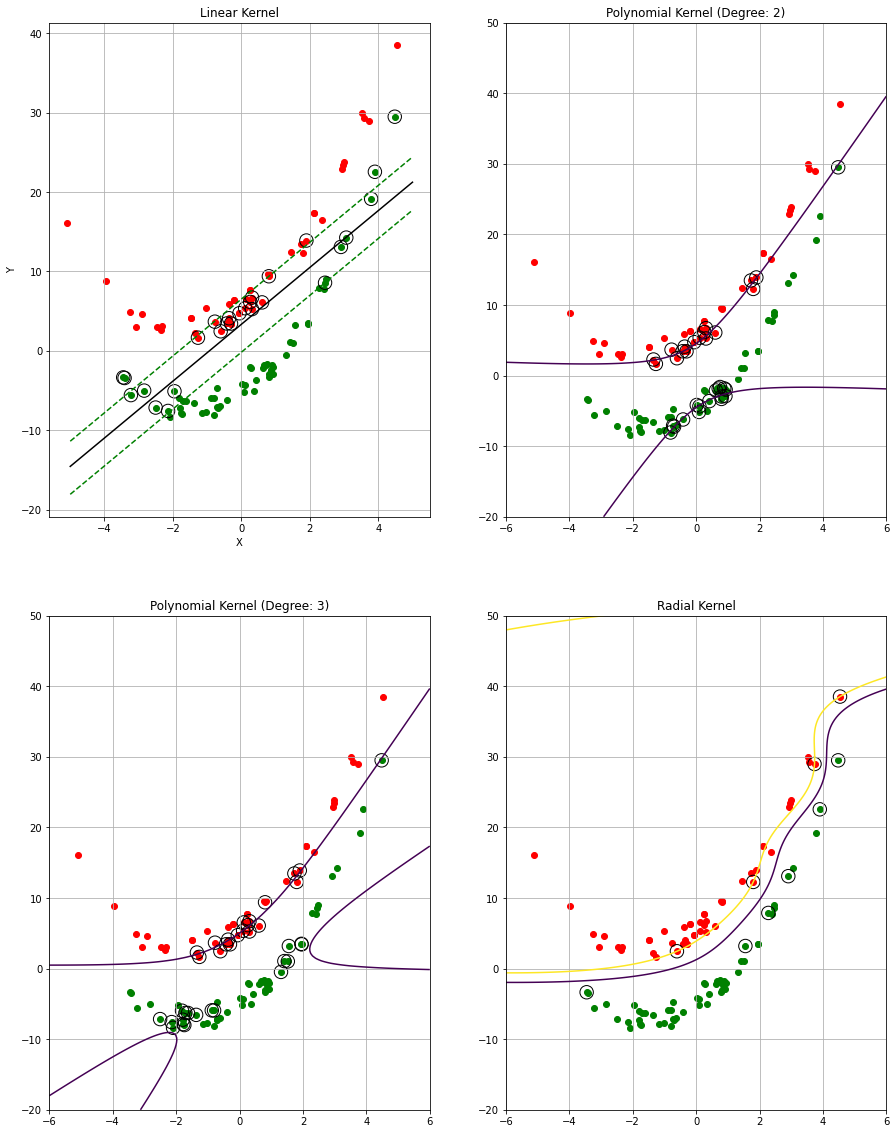

In [7]:
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.svm as svm
from sklearn.metrics import confusion_matrix, roc_curve, auc

np.random.seed(0)
X = np.random.normal(0, 2, 100)
Y = X**2 + 3*X + np.random.normal(0, 1, 100)

c = list(range(0, 100))
c1 = np.random.randint(0, 100, size=50, dtype='l')
c2 = [x for x in c if x not in c1]
Y[c1] = Y[c1] + 5
Y[c2] = Y[c2] - 5

labels = np.asarray([1]*100)
labels[c2] = labels[c2] -2

M = np.column_stack((X,Y))

X_train, X_test, y_train, y_test = train_test_split(M, labels, test_size=0.1)

# fit the linear model
clf = svm.SVC(kernel='linear', C=10000)
clf.fit(X_train, y_train)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(221)

plt.scatter(X[c2], Y[c2], color='g')
plt.scatter(X[c1], Y[c1], color='r')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=180, facecolors='none', edgecolors='black')
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--', color='g')
plt.plot(xx, yy_up, 'k--', color='g')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid()
ax.set_title("Linear Kernel")

#fit polynomial model
clf_poly = svm.SVC(kernel='poly', degree=2, C=1000)
clf_poly.fit(X_train, y_train)

x_min = -6
x_max = 6
y_min = -20
y_max = 50

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf_poly.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
ax = fig.add_subplot(222)

plt.scatter(X[c2], Y[c2], color='g')
plt.scatter(X[c1], Y[c1], color='r')
plt.scatter(clf_poly.support_vectors_[:, 0], clf_poly.support_vectors_[:, 1],
            s=180, facecolors='none', edgecolors='black')

plt.contour(XX, YY, Z, levels=[0])
ax.grid()
ax.set_title("Polynomial Kernel (Degree: 2)")

#fit polynomial model: degree 3
clf_poly_3 = svm.SVC(kernel='poly', degree=3, C=1000)
clf_poly_3.fit(X_train, y_train)

x_min = -6
x_max = 6
y_min = -20
y_max = 50

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf_poly_3.decision_function(np.c_[XX.ravel(), YY.ravel()])
p_poly = clf_poly.predict(M)

# Put the result into a color plot
Z = Z.reshape(XX.shape)
ax = fig.add_subplot(223)

plt.scatter(X[c2], Y[c2], color='g')
plt.scatter(X[c1], Y[c1], color='r')
plt.scatter(clf_poly_3.support_vectors_[:, 0], clf_poly_3.support_vectors_[:, 1],
            s=180, facecolors='none', edgecolors='black')

plt.contour(XX, YY, Z, levels=[0])
ax.grid()
ax.set_title("Polynomial Kernel (Degree: 3)")

#fit radial kernel
clf_radial = svm.SVC(kernel='rbf', C=1000)
clf_radial.fit(X_train, y_train)

Z = clf_radial.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
ax = fig.add_subplot(224)

plt.scatter(X[c2], Y[c2], color='g')
plt.scatter(X[c1], Y[c1], color='r')
plt.scatter(clf_radial.support_vectors_[:, 0], clf_radial.support_vectors_[:, 1],
            s=180, facecolors='none', edgecolors='black')

plt.contour(XX, YY, Z, levels=[0, 1])
ax.grid()
ax.set_title("Radial Kernel")

plt.show()

In [8]:
print("Training miss classification for linear kernel: "
      + str((len(X_train) - sum(y_train == clf.predict(X_train)))*100/len(X_train)))

print("Training miss classification for polynomial kernel (degree 2): "
      + str((len(X_train) - sum(y_train == clf_poly.predict(X_train)))*100/len(X_train)))

print("Training miss classification for polynomial kernel (degree 3): "
      + str((len(X_train) - sum(y_train == clf_poly_3.predict(X_train)))*100/len(X_train)))

print("Training miss classification for radial kernel: "
      + str((len(X_train) - sum(y_train == clf_radial.predict(X_train)))*100/len(X_train)))

print("Test miss classification for linear kernel: "
      + str((len(X_test) - sum(y_test == clf.predict(X_test)))*100/len(X_test)))

print("Test miss classification for polynomial kernel (degree 2): "
      + str((len(X_test) - sum(y_test == clf_poly.predict(X_test)))*100/len(X_test)))

print("Test miss classification for polynomial kernel (degree 3): "
      + str((len(X_test) - sum(y_test == clf_poly_3.predict(X_test)))*100/len(X_test)))

print("Test miss classification for radial kernel: "
      + str((len(X_test) - sum(y_test == clf_radial.predict(X_test)))*100/len(X_test)))

Training miss classification for linear kernel: 7.777777777777778
Training miss classification for polynomial kernel (degree 2): 15.555555555555555
Training miss classification for polynomial kernel (degree 3): 10.0
Training miss classification for radial kernel: 0.0
Test miss classification for linear kernel: 0.0
Test miss classification for polynomial kernel (degree 2): 20.0
Test miss classification for polynomial kernel (degree 3): 0.0
Test miss classification for radial kernel: 0.0


# 6. SVM 2 (16pt)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

**(a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.**

In [10]:
np.random.seed(1)
oj = pd.read_csv("data/OJ.csv")
oj = oj.drop(['Unnamed: 0'], axis=1)
oj['Store7'] = oj['Store7'].map({'Yes': 1, 'No': 0})
X_train, X_test, y_train, y_test = train_test_split(oj.drop(['Purchase'], axis=1), oj[['Purchase']], train_size=800)

**(b) Fit a support vector classifier (```SVC```) to the training data using ````cost=0.01````, with ````Purchase```` as the response and the other variables as predictors.**

In [11]:
clf = svm.SVC(kernel='linear', C=0.01)
print(clf.fit(X_train, y_train.values.ravel()))
print("Number of support vectors: " +str(len(clf.support_vectors_)))

SVC(C=0.01, kernel='linear')
Number of support vectors: 611


**(c) What are the training and test error rates? Use confusion matrix for this problem.**

In [12]:
print("Training Error rate is: " + str(1 - accuracy_score(clf.predict(X_train), y_train)))
print("Test Error rate is: " + str(1 - accuracy_score(clf.predict(X_test), y_test)))
print('Train confusion matrix: ', confusion_matrix(y_train, clf.predict(X_train)))
print('Test confusion matrix: ', confusion_matrix(y_test, clf.predict(X_test)))

Training Error rate is: 0.31000000000000005
Test Error rate is: 0.3592592592592593
Train confusion matrix:  [[489   7]
 [241  63]]
Test confusion matrix:  [[150   7]
 [ 90  23]]


In [13]:
train_err = (7+241)/(489+7+241+63)
test_err = (7+90)/(150+7+90+23)
print('Train error rate: ', train_err)
print('Test error rate: ', test_err)

Train error rate:  0.31
Test error rate:  0.3592592592592593


**(d) Use the ````GridSearchCV```` function to select an optimal ````cost````. Consider values in the range $0.01$ to 10.**

In [14]:
svc = SVC(kernel='linear', random_state=1)
parameters = {'C':np.arange(0.01, 10, 2)}
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

C:\Users\Mark Mintae Kim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Mark Mintae Kim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Mark Mintae Kim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Mark Mintae Kim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(estimator=SVC(kernel='linear', random_state=1),
             param_grid={'C': array([0.01, 2.01, 4.01, 6.01, 8.01])})

In [15]:
clf.best_params_

{'C': 8.01}

**(e) Compute the training and test error rates using this new value for ````cost````.**

In [16]:
model = clf.best_estimator_
print("Training Error rate is: " + str(1 - accuracy_score(model.predict(X_train), y_train)))
print("Test Error rate is: " + str(1 - accuracy_score(model.predict(X_test), y_test)))

Training Error rate is: 0.16374999999999995
Test Error rate is: 0.1777777777777778


In [17]:
print('Train confusion matrix: ', confusion_matrix(y_train, clf.predict(X_train)))
print('Test confusion matrix: ', confusion_matrix(y_test, clf.predict(X_test)))

Train confusion matrix:  [[432  64]
 [ 67 237]]
Test confusion matrix:  [[140  17]
 [ 31  82]]


In [18]:
train_err = (64+67)/(432+64+67+237)
test_err = (17+31)/(140+17+31+82)
print('Train error rate: ', train_err)
print('Test error rate: ', test_err)

Train error rate:  0.16375
Test error rate:  0.17777777777777778


**(f) Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for ````gamma````.**

In [24]:
clf = GridSearchCV(SVC(random_state=1, kernel='rbf'), parameters, n_jobs=4, cv=10)
clf.fit(X=X_train, y=y_train.values.ravel())
print(clf.best_estimator_)
model = clf.best_estimator_
print("Training Error rate is: " + str(1 - accuracy_score(model.predict(X_train), y_train)))
print("Test Error rate is: " + str(1 - accuracy_score(model.predict(X_test), y_test)))

SVC(C=0.01, random_state=1)
Training Error rate is: 0.38
Test Error rate is: 0.4185185185185185


In [25]:
model.n_support_

array([304, 304])

In [26]:
print('Train confusion matrix: ', confusion_matrix(y_train, model.predict(X_train)))
print('Test confusion matrix: ', confusion_matrix(y_test, model.predict(X_test)))

Train confusion matrix:  [[496   0]
 [304   0]]
Test confusion matrix:  [[157   0]
 [113   0]]


In [27]:
train_err = (0+304)/(496+0+304+0)
test_err = (0+113)/(157+0+113+0)

print('Train error rate: ', train_err)
print('Test error rate: ', test_err)

Train error rate:  0.38
Test error rate:  0.4185185185185185


In [28]:
svc = SVC(kernel='rbf', random_state=1)

parameters = {'C':np.arange(0.01, 10, 2)}

clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

C:\Users\Mark Mintae Kim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Mark Mintae Kim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Mark Mintae Kim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Mark Mintae Kim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(estimator=SVC(random_state=1),
             param_grid={'C': array([0.01, 2.01, 4.01, 6.01, 8.01])})

In [29]:
clf.best_params_

{'C': 0.01}

In [30]:
print('Train confusion matrix: ', confusion_matrix(y_train, clf.predict(X_train)))
print('Test confusion matrix: ', confusion_matrix(y_test, clf.predict(X_test)))

Train confusion matrix:  [[496   0]
 [304   0]]
Test confusion matrix:  [[157   0]
 [113   0]]


In [31]:
train_err = (0+304)/(496+0+304+0)
test_err = (0+113)/(157+0+113+0)

print('Train error rate: ', train_err)
print('Test error rate: ', test_err)

Train error rate:  0.38
Test error rate:  0.4185185185185185


**(g) Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set ````degree=2````.**

In [32]:
## Write your answer here
svc = SVC(C=0.01, kernel='poly', degree=2, random_state=1)
svc.fit(X_train, y_train)

C:\Users\Mark Mintae Kim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=0.01, degree=2, kernel='poly', random_state=1)

In [33]:
svc.n_support_

array([304, 304])

In [34]:
print('Train confusion matrix: ', confusion_matrix(y_train, svc.predict(X_train)))
print('Test confusion matrix: ', confusion_matrix(y_test, svc.predict(X_test)))

Train confusion matrix:  [[496   0]
 [304   0]]
Test confusion matrix:  [[157   0]
 [113   0]]


In [36]:
train_err = (0+304)/(496+0+304+0)
test_err = (0+113)/(157+0+113+0)

print('Train error rate: ', train_err)
print('Test error rate: ', test_err)

Train error rate:  0.38
Test error rate:  0.4185185185185185


In [37]:
svc = SVC(kernel='poly', degree=2, random_state=1)

parameters = {'C':np.arange(0.01, 10, 2)}

clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

C:\Users\Mark Mintae Kim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Mark Mintae Kim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Mark Mintae Kim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Mark Mintae Kim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(estimator=SVC(degree=2, kernel='poly', random_state=1),
             param_grid={'C': array([0.01, 2.01, 4.01, 6.01, 8.01])})

In [38]:
clf.best_params_

{'C': 0.01}

In [39]:
print('Train confusion matrix: ', confusion_matrix(y_train, clf.predict(X_train)))
print('Test confusion matrix: ', confusion_matrix(y_test, clf.predict(X_test)))

Train confusion matrix:  [[496   0]
 [304   0]]
Test confusion matrix:  [[157   0]
 [113   0]]


In [40]:
train_err = (0+304)/(496+0+304+0)
test_err = (0+113)/(157+0+113+0)

print('Train error rate: ', train_err)
print('Test error rate: ', test_err)

Train error rate:  0.16375
Test error rate:  0.17407407407407408


**(h) Overall, which approach seems to give the best results on this data?**

Overall, the approach that seems to give the best results on this data is the model in part (e).

# 7. Clustering (16pt)

**In Lab 9, we implemented K-means clustering using ````KMeans()```` . For this question, you will implement K-means clustering from scratch following the class format of sklearn. Reproduce Section 2.1 in Lab 9. Note that you may not be able to get the exact same results.**

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Generate data
np.random.seed(2)
X = np.random.standard_normal((25,2))
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4

# KMeans class
class KMeans:
    
    def __init__(self, n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=1e-4):

        self.n_clusters = n_clusters
        self.init = init
        self.max_iter = max_iter
        self.tol = tol

    def _init_centroids(self, X, x_squared_norms, init, random_state, init_size=None):
        n_samples = X.shape[0]
        n_clusters = self.n_clusters

        if init_size is not None and init_size < n_samples:
            init_indices = random_state.randint(0, n_samples, init_size)
            X = X[init_indices]
            x_squared_norms = x_squared_norms[init_indices]
            n_samples = X.shape[0]

        if isinstance(init, str) and init == 'k-means++':
            centers, _ = _kmeans_plusplus(X, n_clusters, random_state=random_state, x_squared_norms=x_squared_norms)
        elif isinstance(init, str) and init == 'random':
            seeds = random_state.permutation(n_samples)[:n_clusters]
            centers = X[seeds]
        elif hasattr(init, '__array__'):
            centers = init
        elif callable(init):
            centers = init(X, n_clusters, random_state=random_state)
            centers = check_array(
                centers, dtype=X.dtype, copy=False, order='C')
            self._validate_center_shape(X, centers)

        if sp.issparse(centers):
            centers = centers.toarray()

        return centers

    def fit(self, X):

        for i in range(self._n_init):
            # Initialize centers
            centers_init = self._init_centroids(
                X, x_squared_norms=x_squared_norms, init=init,
                random_state=random_state)

            # run a k-means once
            labels, inertia, centers, n_iter_ = kmeans_single(
                X, sample_weight, centers_init, max_iter=self.max_iter,
                verbose=self.verbose, tol=self._tol,
                x_squared_norms=x_squared_norms, n_threads=self._n_threads)

            # determine if these results are the best so far
            if best_inertia is None or inertia < best_inertia:
                best_labels = labels
                best_centers = centers
                best_inertia = inertia
                best_n_iter = n_iter_

        self.cluster_centers_ = best_centers
        self.labels_ = best_labels
        self.inertia_ = best_inertia
        self.n_iter_ = best_n_iter
        return self


    def k_means(X, n_clusters, *, sample_weight=None, init='k-means++',
                precompute_distances='deprecated', n_init=10, max_iter=300,
                verbose=False, tol=1e-4, random_state=None, copy_x=True,
                n_jobs='deprecated', algorithm="auto", return_n_iter=False):

        est = KMeans(
            n_clusters=n_clusters, init=init, n_init=n_init, max_iter=max_iter,
            verbose=verbose, precompute_distances=precompute_distances, tol=tol,
            random_state=random_state, copy_x=copy_x, n_jobs=n_jobs,
            algorithm=algorithm
        ).fit(X, sample_weight=sample_weight)
        if return_n_iter:
            return est.cluster_centers_, est.labels_, est.inertia_, est.n_iter_
        else:
            return est.cluster_centers_, est.labels_, est.inertia_

    def _kmeans_single(X, sample_weight, centers_init, max_iter=300,
                             verbose=False, x_squared_norms=None, tol=1e-4,
                             n_threads=1):

        n_clusters = centers_init.shape[0]

        # Buffers to avoid new allocations at each iteration.
        centers = centers_init
        centers_new = np.zeros_like(centers)
        labels = np.full(X.shape[0], -1, dtype=np.int32)
        labels_old = labels.copy()
        weight_in_clusters = np.zeros(n_clusters, dtype=X.dtype)
        center_shift = np.zeros(n_clusters, dtype=X.dtype)

        strict_convergence = False

        # Threadpoolctl context to limit the number of threads in second level of
        # nested parallelism (i.e. BLAS) to avoid oversubsciption.
        with threadpool_limits(limits=1, user_api="blas"):
            for i in range(max_iter):
                lloyd_iter(X, sample_weight, x_squared_norms, centers, centers_new,
                           weight_in_clusters, labels, center_shift, n_threads)

                if verbose:
                    inertia = _inertia(X, sample_weight, centers, labels)
                    print(f"Iteration {i}, inertia {inertia}.")

                centers, centers_new = centers_new, centers

                if np.array_equal(labels, labels_old):
                    # First check the labels for strict convergence.
                    if verbose:
                        print(f"Converged at iteration {i}: strict convergence.")
                    strict_convergence = True
                    break
                else:
                    # No strict convergence, check for tol based convergence.
                    center_shift_tot = (center_shift**2).sum()
                    if center_shift_tot <= tol:
                        if verbose:
                            print(f"Converged at iteration {i}: center shift "
                                  f"{center_shift_tot} within tolerance {tol}.")
                        break

                labels_old[:] = labels

            if not strict_convergence:
                # rerun E-step so that predicted labels match cluster centers
                lloyd_iter(X, sample_weight, x_squared_norms, centers, centers,
                           weight_in_clusters, labels, center_shift, n_threads,
                           update_centers=False)

        inertia = _inertia(X, sample_weight, centers, labels)

        return labels, inertia, centers, i + 1

In [54]:
# Example of running KMeans
km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(X)

AttributeError: 'KMeans' object has no attribute '_n_init'

# 8. PCA: Proportion of Variance Explained (PVE) (15pt)

**In Lab 9, we learned how to calculate PVE by using ``sklearn``. In this exercise, calculate PVE from scratch by implementing the following equation:**

$\frac{\sum_{i=1}^{n}\left(\sum_{j=1}^{p} \phi_{j m} x_{i j}\right)^{2}}{\sum_{j=1}^{p} \sum_{i=1}^{n} x_{i j}^{2}}$ (Equation 10.8 in the textbook)

**and compare the results with the PVE that is computed by ``sklearn``.**



In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Import dataset
df = pd.read_csv('data/USArrests.csv', index_col=0)
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

pca = PCA()
pca.fit(X)
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

By applying Equation 10.8 directly. That is, use the function to compute the principal component loadings. Then, use those loadings in Equation 10.8 to obtain the PVE.

In [44]:
df = pd.read_csv("data/USArrests.csv")
df.rename(columns={'Unnamed: 0': 'State'}, inplace=True)
df[['Murder', 'Assault', 'UrbanPop', 'Rape']] = scale(df[['Murder', 'Assault', 'UrbanPop', 'Rape']], axis=1)

pca = PCA(n_components=1)
principalComponents = pca.fit_transform(df[['Murder', 'Assault', 'UrbanPop', 'Rape']])
print("Variance Explained (from the model): " + str(pca.explained_variance_ratio_[0]))
print("Variance Explained (calculated manually): " + str(np.var(principalComponents)/df.var().sum()))

Variance Explained (from the model): 0.9453253030966985
Variance Explained (calculated manually): 0.9264187970347644
